<a href="https://colab.research.google.com/github/mequanent/Social-Networks/blob/main/SN_Link_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Import Libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import tensorflow as tf
import pydot
import time
%matplotlib inline

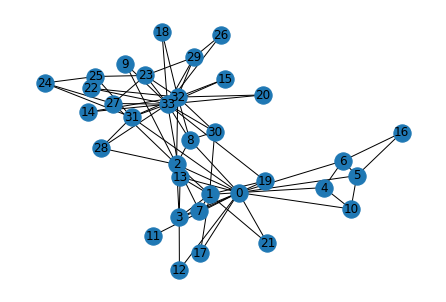

In [2]:
#@title Load the graph
G = nx.karate_club_graph()

# visualize the graph
nx.draw(G, with_labels = True)

In [3]:
#@title Some Graph Descriptions
print("Total No. of nodes: ", G.number_of_nodes()) 
print("Total No. of edges: ", G.number_of_edges())
print(list(nx.nodes(G))) # list of nodes
print(list(G.neighbors(0)))

Total No. of nodes:  34
Total No. of edges:  78
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


# Lab Practice

In [ ]:
# assigned by input
edge_to_remove = [75, 51, 18]

# remove edges
removed_edges = list()
for i in edge_to_remove:
    u = list(G.edges)[i][0]
    v = list(G.edges)[i][1]
    removed_edges.append([u,v])
    G.remove_edge(u,v)
k = len(removed_edges)
removed_edges

In [ ]:
#@title Edges removing function 
def remove_edges(graph, edgelist):

  edge_to_remove = [75, 51, 18]

  # remove edges
  removed_edges = list()
  for i in edgelist:
      u = list(graph.edges)[i][0]
      v = list(graph.edges)[i][1]
      removed_edges.append([u,v])
      graph.remove_edge(u,v)
  k = len(removed_edges)
  return graph

In [ ]:
#@title cn, jaccard, pref_attachment, adamic
cn = nx.common_neighbor_centrality(G) # common neighbor 
jaccard = nx.jaccard_coefficient(G) 
pref_attachment = nx.preferential_attachment(G) 
adamic = nx.adamic_adar_index(G) 

In [6]:
#@title Local Clustering Coefficient

# Addition is used in the local clustering 
def get_LCC():
  LCC = dict()
  for i in G.nodes:
    triangles = nx.triangles(G, i)
    k = nx.degree(G, i)
    lcc = 0
    if k > 1:
      lcc = (2* triangles) /(k*(k-1))
    LCC[i] = lcc

  lccs = []
  for u in G.nodes:
    for v in G.nodes:
      if u not in nx.neighbors(G, v) and u < v:
        lccs.append((u, v, LCC[u] + LCC[v])) 
  
  return lccs

In [ ]:
#@title Local Clustering Coefficient

# Addition is used in the local clustering 
def get_LCC(g):
  LCC = dict()
  for i in g.nodes:
    triangles = nx.triangles(g, i)
    k = nx.degree(g, i)
    lcc = 0
    if k > 1:
      lcc = (2* triangles) /(k*(k-1))
    LCC[i] = lcc

  lccs = []
  for u in g.nodes:
    for v in g.nodes:
      if u not in nx.neighbors(g, v) and u < v:
        lccs.append((u, v, LCC[u] + LCC[v])) 
  
  return lccs

In [ ]:
#@title SimRank (TO DO)

# TO DO
def get_simRank(g):
  simRank = dict()

  for i in g.nodes:
    triangles = nx.triangles(g, i)
    k = nx.degree(g, i)
    lcc = 0
    if k > 1:
      lcc = (2* triangles) /(k*(k-1))
    simRank[i] = lcc

  return simRank


In [ ]:
#@title Sort the coefficients 
lccs =  get_LCC(G)
simRank = get_simRank(G)

# sort the coefficients  
sorted_cn = sorted(cn, key=lambda tup: tup[2], reverse=True)
sorted_jaccard = sorted(jaccard, key=lambda tup: tup[2], reverse=True)
sorted_adamic = sorted(adamic, key=lambda tup: tup[2], reverse=True)
sorted_pref_attachment = sorted(pref_attachment, key=lambda tup: tup[2], reverse=True)
sorted_lcc = sorted(lccs, key=lambda tup: tup[2], reverse=True)
sorted_simRank = sorted(simRank, key=lambda tup: tup[2], reverse=True)

In [ ]:
#@title Mean Rank (MR)
def MR(sorted_tuple):
  rank_cn = 0
  idx = 0
  for u,v,val in sorted_tuple:
      if [u,v] in removed_edges:
          rank_cn += idx
      idx += 1
  return rank_cn/k

In [ ]:
#@title Mean Reciprocal Rank (MRR)
def MRR(sorted_tuple):
  rank_cn = 0
  idx = 0
  for u,v,val in sorted_tuple:
      if [u,v] in removed_edges:
          rank_cn += 1/(idx+1) # 1/(idx +1)
      idx += 1
  return rank_cn/k

In [ ]:
#@title Hit@N
def hitN(sorted_tuple, N):
  hits = 0
  idx = 0
  for u,v,val in sorted_tuple:
      if [u,v] in removed_edges:
        if idx < N:
          hits += 1 
      idx += 1
  return hits

In [4]:
#@title Print Evaluation Metrics

# display metrics and the time to compute all of them together
def display_metrics(coef, title):
  start = time.time()
  print(title)
  print("Common Neighbors ")
  print("MR: ", MR(coef))
  print("MRR: ", MRR(coef))
  print("Hit@100: ", hitN(coef, 100))
  end = time.time()
  print("Time %f seconds" % (end-start))
  print("\n")

In [ ]:
#@title Display metrics of coefficients
# sorted_cn, sorted_jaccard, sorted_adamic, sorted_pref_attachment, sorted_lcc
display_metrics(sorted_cn, "Common Neighbor")
display_metrics(sorted_jaccard, "Jaccard Coefficient")
display_metrics(sorted_adamic, "Adamic/Adar")
display_metrics(sorted_pref_attachment, "Preferential Attachment ")
display_metrics(sorted_lcc, "Local Clustering Coefficient")
display_metrics(sorted_simRank, "SimRank")

In [ ]:
print("Common Neighbors ")
print("MR: ", MR(sorted_cn))
print("MRR: ", MRR(sorted_cn))
print("Hit@100: ", hitN(sorted_cn, 100))
print("\n")

print("Jaccard ")
print("MR: ", MR(sorted_jaccard))
print("MRR: ", MRR(sorted_jaccard))
print("Hit@100: ", hitN(sorted_jaccard, 100))
print("\n")

print("Adamic/Adar ")
print("MR: ", MR(sorted_adamic))
print("MRR: ", MRR(sorted_adamic))
print("Hit@100: ", hitN(sorted_adamic, 100))
print("\n")

print("Preferential Attachment ")
print("MR: ", MR(sorted_pref_attachment))
print("MRR: ", MRR(sorted_pref_attachment))
print("Hit@100: ", hitN(sorted_pref_attachment, 100))
print("\n")

print("Local Clustering Coefficient Add ")
print("MR: ", MR(sorted_lcc)) # 370.33 for +
print("MRR: ", MRR(sorted_lcc))
print("Hit@100: ", hitN(sorted_lcc, 100))
print("\n")

Common Neighbors 
MR:  160.0
MRR:  0.16947380784590085
Hit@100:  1


Jaccard 
MR:  184.33333333333334
MRR:  0.009448265393428837
Hit@100:  1


Adamic/Adar 
MR:  131.0
MRR:  0.034283192010123746
Hit@100:  1


Preferential Attachment 
MR:  74.0
MRR:  0.030890133831310302
Hit@100:  2


Local Clustering Coefficient Add 
MR:  370.3333333333333
MRR:  0.0032687769188367924
Hit@100:  0




## Node Similarities

Common Neighbor
$$s(v_i, v_j)=|N(v_i)\cap N(v_j)|$$

Jaccard similarity
$$s_{jaccard}(v_i, v_j)=\frac{|N(v_i)\cap N(v_j)|}{|N(v_i)\cup N(v_j)|}$$
Adamic/Adar/Cosine similarity
$$s_{cosine}(v_i, v_j)=\frac{|N(v_i)\cap N(v_j)|}{\sqrt{|N(v_i)|\cdot|N(v_j)|}}$$